In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

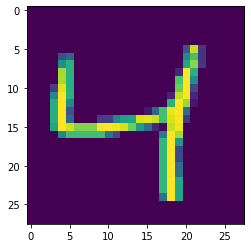

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
X_train.shape

(60000, 28, 28)

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 18s 10ms/step - loss: 3.8594 - accuracy: 0.8560 - val_loss: 1.7040 - val_accuracy: 0.9127
Epoch 2/15
1500/1500 [==============================] - 13s 9ms/step - loss: 1.4639 - accuracy: 0.8834 - val_loss: 1.1324 - val_accuracy: 0.9242
Epoch 3/15
1500/1500 [==============================] - 13s 9ms/step - loss: 1.1476 - accuracy: 0.8912 - val_loss: 0.9593 - val_accuracy: 0.9323
Epoch 4/15
1500/1500 [==============================] - 13s 8ms/step - loss: 1.0109 - accuracy: 0.8986 - val_loss: 0.8622 - val_accuracy: 0.9342
Epoch 5/15
1500/1500 [==============================] - 14s 9ms/step - loss: 0.9293 - accuracy: 0.9017 - val_loss: 0.7888 - val_accuracy: 0.9416
Epoch 6/15
1500/1500 [==============================] - 13s 9ms/step - loss: 0.8885 - accuracy: 0.9030 - val_loss: 0.7203 - val_accuracy: 0.9470
Epoch 7/15
1500/1500 [==============================] - 13s 9ms/step - loss: 0.8374 - accuracy: 0.9065 - val_loss: 0.6957 - val_a

In [13]:
from sklearn.metrics import accuracy_score

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
accuracy_score(y_test,y_pred)

313/313 [==============================] - 1s 3ms/step


0.9295

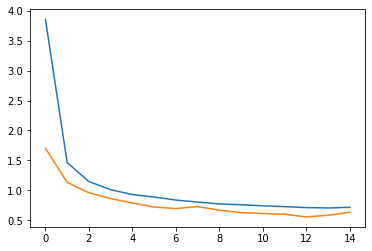

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

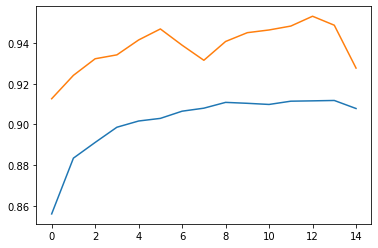

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

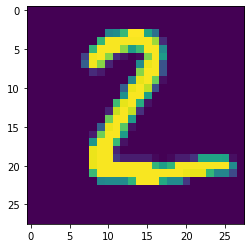

In [16]:
plt.imshow(X_test[1])

In [17]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 276ms/step


array([2])